# CAT Vehicle circular trajectory simulation

## import required libraries

In [7]:
import sparkle
import os
from sparkle import lane
from sparkle import api
from sparkle import catvehicle
from sparkle import gzstats
homedir = os.path.expanduser("~")
import uuid
import glob
import bagpy
import pandas as pd
import signal
import  time
import seaborn as sea
from bagpy import bagreader

## declare simulation parameters

In [3]:
datadir = homedir +"/CyverseData/ProjectSparkle/RTFvsNVehicles"
n_vehicles = 2
include_laser = False
circumference = 260
max_update_rate = 100.0 # for gazebo
time_step = 0.01 # for gazebo
leader_vel = 8.0
log_time = 60
unique_runid = str(uuid.uuid4())
description = "Circular Trajectory, Unique run ID = " + unique_runid


# 2.82321111
# wb = [2.82321111]

print("Wheelbase: {}".format(w))
sim_config = {"n_vehicles":  n_vehicles, 
              "include_laser": include_laser, 
              "circumference": circumference,
              "max_update_rate": max_update_rate, 
              "time_step": time_step, 
              "leader_vel": leader_vel,
              "log_time": log_time, 
              "description": description,
              "package_name": "catvehicle",
              "logdir": datadir}

C = catvehicle(**sim_config)
C.create()
C.spawn()
time.sleep(2)

C.control(leader_vel=leader_vel, logdir = datadir, )
C.rviz(C.package_path + "/config/magna_multi.rviz")
time.sleep(log_time)
C.destroy(signal.SIGINT)

Wheelbase: 2.82321111
************ Radius of the circle is 41.3802852039 ************
Theta:3.14159265359 radian.
Constant Steering Angle:=0.0681204300119
Sparkle layout instance created.
Number of CPU on this machine: 8
PACKAGE NAME BEING EXECUTED IS catvehicle
... logging to /home/ivory/.ros/log/1e2a9482-15df-11eb-9142-144f8af0bf40/roslaunch-ivory-26424.log
started roslaunch server http://ivory.local:41475/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /gazebo/enable_ros_network: True
 * /rosdistro: melodic
 * /rosversion: 1.14.9
 * /use_sim_time: True

NODES
  /
    gazebo (gazebo_ros/gzserver)

ROS_MASTER_URI=http://localhost:11311
process[gazebo-1]: started with pid [26951]
Empty world launched.
Current  max_update_rate is 100.0
1e2a9482-15df-11eb-9142-144f8af0bf40
... logging to /home/ivory/.ros/log/1e2a9482-15df-11eb-9142-144f8af0bf40/roslaunch-ivory-26424.log
1e2a9482-15df-11eb-9142-144f8af0bf40
... logging to /home/ivory/.ros/log/1e2a9482-15df-11eb-9142-144f8af0bf40/rosl

started roslaunch server http://ivory.local:46745/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /magna/constVel: 0.0
 * /magna/strAngle: 0.0681204300119
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /magna/
    stepvel_magna (stepvel/stepvel_node)

ROS_MASTER_URI=http://localhost:11311
process[magna/stepvel_magna-20]: started with pid [28051]
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/stepvel.launch started with run-time arguments ['vel:=0.0', 'robot:=magna', 'strAng:=0.0681204300119']
Velocity node 0  started.
1e2a9482-15df-11eb-9142-144f8af0bf40
... logging to /home/ivory/.ros/log/1e2a9482-15df-11eb-9142-144f8af0bf40/roslaunch-ivory-26424.log
started roslaunch server http://ivory.local:33805/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /nebula/constVel: 0.0
 * /nebula/strAngle: 0.0681204300119
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /nebula/
    stepvel_nebula (stepvel/stepvel_node)

ROS_MASTER_URI=http://localhost:11311
proc

[gazebo-1] process has died [pid 26951, exit code -15, cmd /opt/ros/melodic/lib/gazebo_ros/gzserver -e ode /home/ivory/VersionControl/catvehicle_ws/src/catvehicle/worlds/plane.world __name:=gazebo __log:=/home/ivory/.ros/log/1e2a9482-15df-11eb-9142-144f8af0bf40/gazebo-1.log].
log file: /home/ivory/.ros/log/1e2a9482-15df-11eb-9142-144f8af0bf40/gazebo-1*.log


rosnode kill: (None, None)
ps -aef  STDOUT:(None, None)
Retrieving latest bag file
Bag File Recorded Is: catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34.bag
mkdir STDOUT:("mkdir: created directory 'catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34'\n", None)
Renaming GZStat log file [/home/ivory/CyverseData/ProjectSparkle/RTFvsNVehicles/gz_stats_2020-10-24-02-56-38-619483.txt] to retain bag file information
mv STDOUT:("renamed '/home/ivory/CyverseData/ProjectSparkle/RTFvsNVehicles/gz_stats_2020-10-24-02-56-38-619483.txt' -> 'catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34/catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34_gzStats.txt'\n", None)
Killing roscore
psutil.Process(pid=26842, name='sh', started='02:55:58')
[psutil.Process(pid=26843, name='roscore', started='02:55:58'), psutil.

## Analysis

In [4]:
bag = C.latesbag()
gz_stat_file = C.gzstatsfile
GZ = gzstats(gz_stat_file)
GZ.dataframe.to_csv(gz_stat_file[0:-4]+".csv")

Retrieving latest bag file
Bag File Recorded Is: catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34.bag
mkdir STDOUT:('', None)
Renaming GZStat log file [catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34/catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34_gzStats.txt] to retain bag file information
mv STDOUT:('', None)


[INFO]  Data folder /home/ivory/CyverseData/ProjectSparkle/RTFvsNVehicles/catvehicle_n_2_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_60_2020-10-24-02-56-34 already exists. Not creating.


/home/ivory/.local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


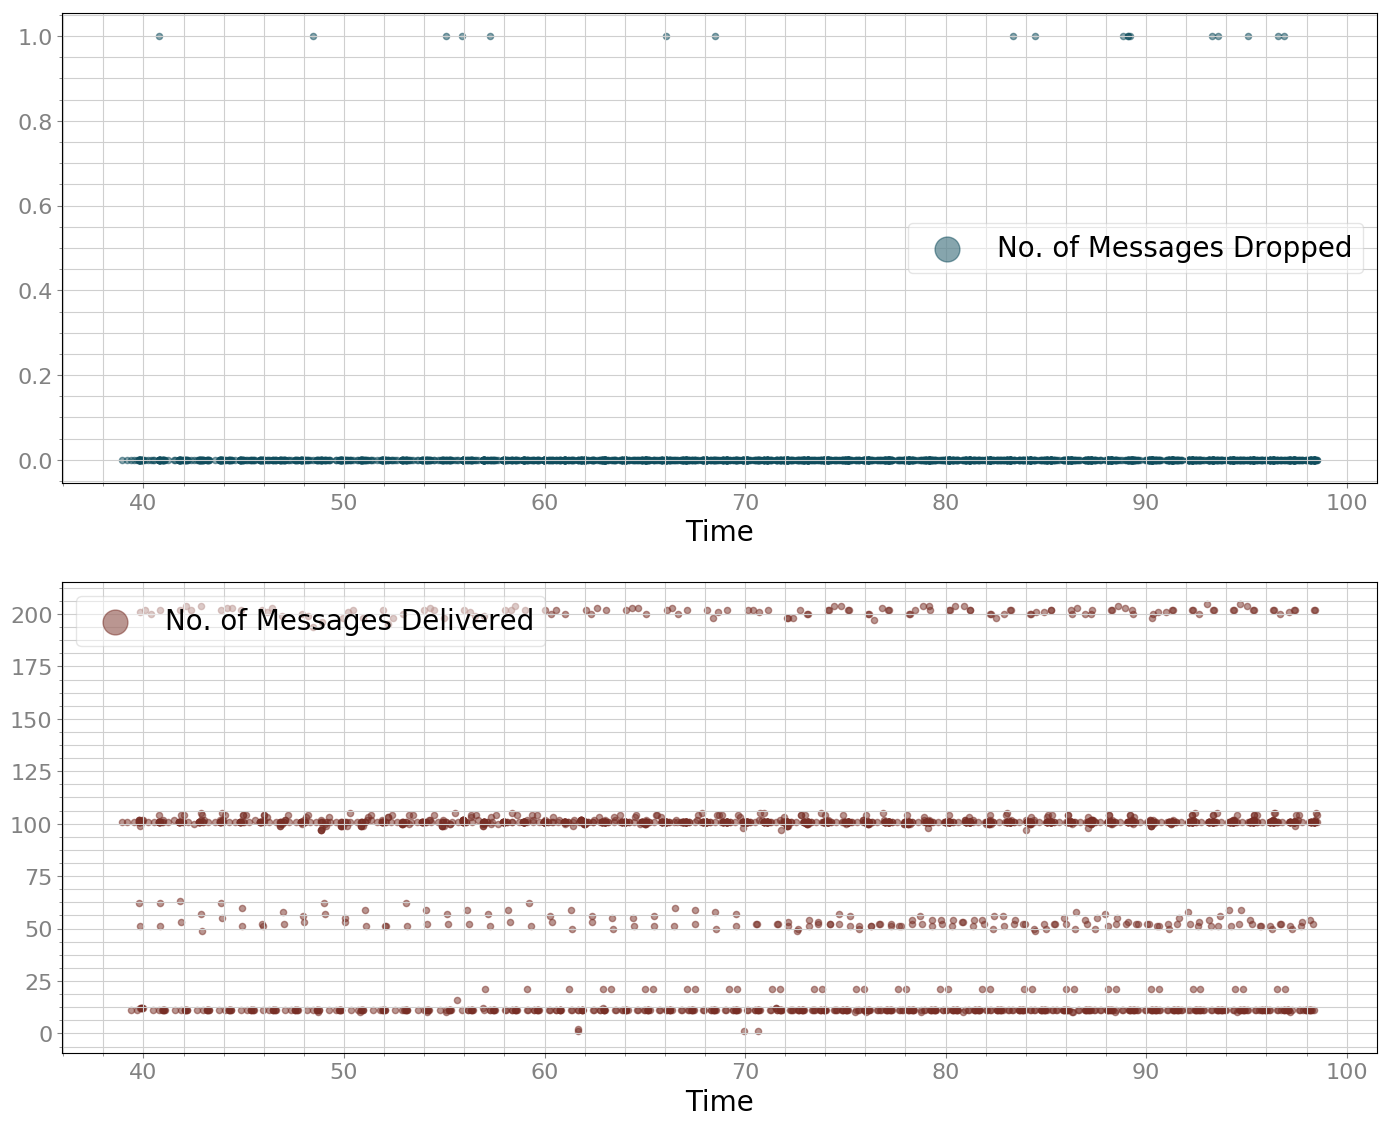

In [8]:
b = bagreader(bag)
statistics_file = b.message_by_topic('/statistics')
statistics = pd.read_csv(statistics_file)
fig, ax = bagpy.create_fig(2)
ax[0].scatter(x = 'Time', y = 'dropped_msgs', data =statistics, label = 'No. of Messages Dropped', alpha = 0.5, s = 20, c = '#0f4c5c')
ax[1].scatter(x = 'Time', y = 'delivered_msgs', data =statistics, label = 'No. of Messages Delivered',alpha = 0.5,  s = 20, c = '#772e25')
ax[0].legend(markerscale = 4, fontsize = 20)
ax[1].legend(markerscale = 4, fontsize = 20)
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

fig.show()